In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.fftpack import fft,ifft
from schrodinger import Schrodinger
import matplotlib.pyplot as plt
import scipy
import sympy as sp

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')
import seaborn as sns

#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('poster', font_scale=0.9,  rc={"lines.linewidth": 5})

In [3]:
# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

In [4]:
#define x grid:
x = np.linspace(-20,20,2000)

# specify potential at grid points
V_x = np.zeros(shape=x.shape)

In [5]:
#Specify initial wave function at grid points:
@np.vectorize
def psiF(x,sigma=1.0,mu=0.0,k0=1):
    norm = 1/(np.pi*sigma**2)**(1/4)
    f = np.exp(-(x-mu)**2/(4*sigma**2))
    f *= np.exp(np.complex(0,k0*x))
    
    return  norm*f
    
psi_x0 = psiF(x=x)

/tmp/ipykernel_4894/1052430723.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f *= np.exp(np.complex(0,k0*x))


In [6]:
# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,  psi_x0=psi_x0, V_x=V_x,
                    hbar=hbar, m=m)

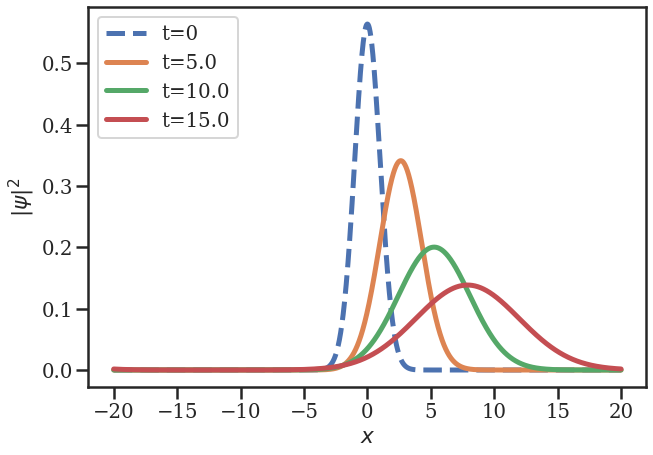

In [7]:
fig = plt.figure(figsize=(10,7))
plt.plot(x,np.abs(psi_x0)**2,linestyle='--',label=r't=0')
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
S.time_step(dt=1e-2,Nsteps=500)
plt.plot(S.x,np.abs(S.psi_x)**2,label=r't=%1.1f'%S.t)
plt.legend(loc='upper left')
plt.xlabel(r'$x$')
plt.ylabel(r'$|\psi|^2$')
plt.savefig('gaussianWavePacket.png')
plt.show()

### Animation:

In [8]:
######################################################################
# define the Schrodinger object which performs the calculations
psi_x0 = psiF(x=x)
S = Schrodinger(x=x,  psi_x0=psi_x0, V_x=V_x,
                    hbar=hbar, m=m)

# Set up plot
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(10,8))

psi_x_line, = ax1.plot([], [])
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|^2$')
title = ax1.set_title("")
ax1.set_xlim(x.min(),x.max())
ax1.set_ylim(0,max(np.abs(psi_x0)**2))


# Animate plot
def init():
    psi_x_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, np.abs(S.psi_x)**2)

    title.set_text("t = %.2f" % S.t)
        
    return (psi_x_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
dt = 0.005
N_steps = 50
t_max = 15
frames = int(t_max / float(N_steps * dt))

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=100, blit=True)

#Para salvar corretamente, tem que descomentar a linha de baixo
anim.save('schrodingerFree.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

#Para ver o video no notebook deve comentar a linha de cima
plt.close()
anim


/tmp/ipykernel_4894/1052430723.py:6: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f *= np.exp(np.complex(0,k0*x))
